In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import gc
import torch
import torchvision
import pandas as pd

from runner import Runner
from utils import train_val_dataset, plot_from_batch_generator, ImageTransformer, ImageFolder2

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
DATA_PATH = '../data/'
RESULTS_PATH = 'results/'
MODELS_PATH = 'models/'
NUM_CLASSES = 30
BATCH_SIZE = 64
NUM_WORKERS = 4

In [4]:
if not os.path.exists(RESULTS_PATH):
    os.mkdir(RESULTS_PATH)
    
if not os.path.exists(MODELS_PATH):
    os.mkdir(MODELS_PATH)

In [5]:
transformer = torchvision.models.Swin_B_Weights.IMAGENET1K_V1.transforms()

train_dataset = ImageFolder2(
    os.path.join(DATA_PATH, 'train'),
    os.path.join(DATA_PATH, 'train.csv'),
)


train_transform = torchvision.transforms.Compose([
    torchvision.transforms.AutoAugment(torchvision.transforms.AutoAugmentPolicy.IMAGENET),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


val_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


datasets = train_val_dataset(train_dataset, val_split=0.2, random_state=42, shuffle=True, stratify=True,
                             train_transform=train_transform,
                             val_transform=val_transform)



print(len(datasets['train']), len(datasets['val']))


train_batch_gen = torch.utils.data.DataLoader(datasets['train'], 
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              num_workers=NUM_WORKERS)

val_batch_gen = torch.utils.data.DataLoader(datasets['val'],
                                            batch_size=BATCH_SIZE,
                                            num_workers=NUM_WORKERS)

36298 9075


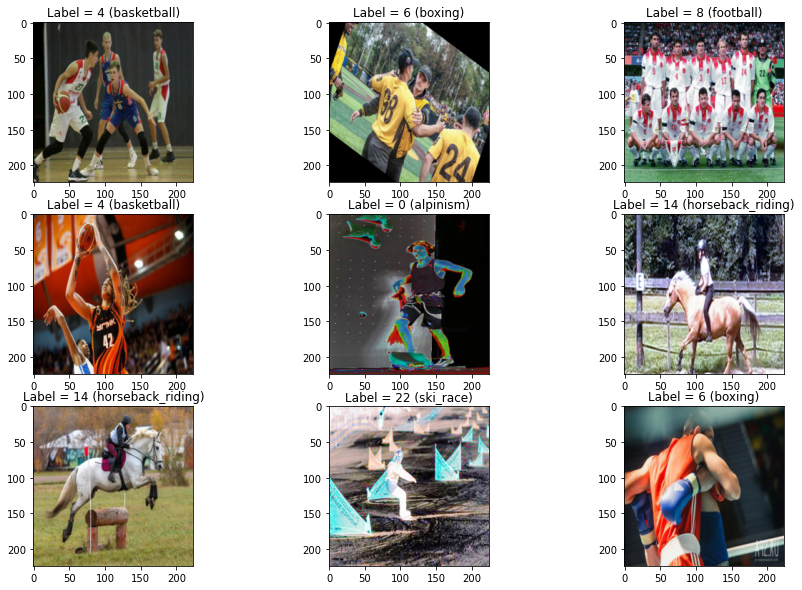

In [6]:
plot_from_batch_generator(train_batch_gen)

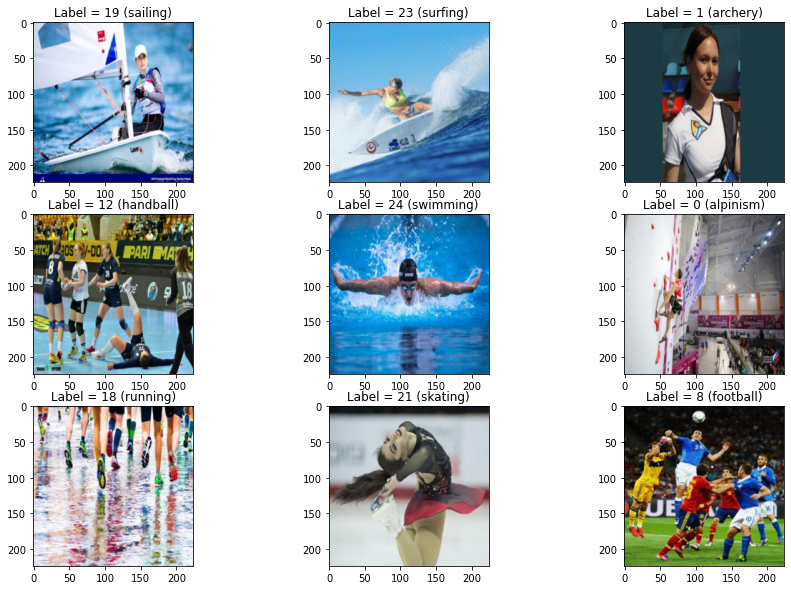

In [7]:
plot_from_batch_generator(val_batch_gen)

In [9]:
model_swin = torchvision.models.swin_b(
    weights=torchvision.models.Swin_B_Weights.IMAGENET1K_V1,
    progress=True
)

for name, p in model_swin.named_parameters():
    p.requires_grad_(False)
    
model_swin.head = torch.nn.Linear(1024, NUM_CLASSES)

epoch   1/  7 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   1/  7 took 388.84s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.5265 | accuracy: 0.8592 | f1-weighted: 0.8591 | f1-micro: 0.8592


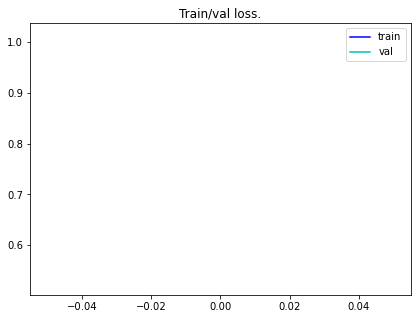

epoch   2/  7 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   2/  7 took 392.67s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.4650 | accuracy: 0.8743 | f1-weighted: 0.8739 | f1-micro: 0.8743


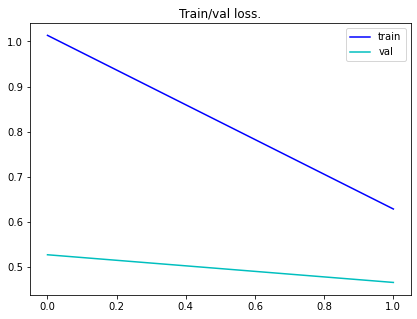

epoch   3/  7 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   3/  7 took 392.42s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.4371 | accuracy: 0.8857 | f1-weighted: 0.8859 | f1-micro: 0.8857


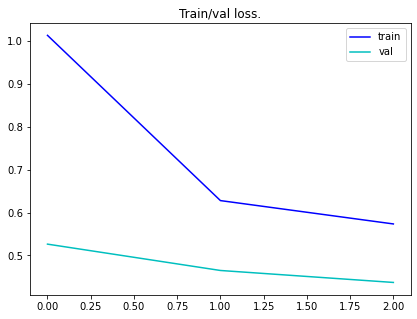

epoch   4/  7 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   4/  7 took 393.43s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.4205 | accuracy: 0.8896 | f1-weighted: 0.8897 | f1-micro: 0.8896


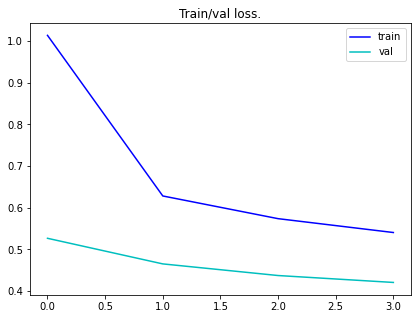

epoch   5/  7 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   5/  7 took 390.97s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.4101 | accuracy: 0.8949 | f1-weighted: 0.8948 | f1-micro: 0.8949


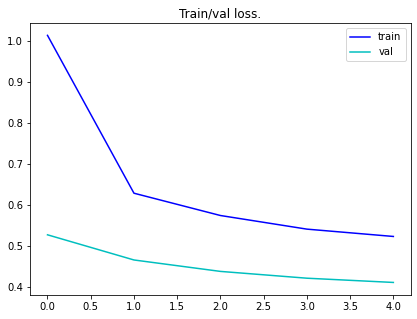

epoch   6/  7 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   6/  7 took 395.40s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.4037 | accuracy: 0.8943 | f1-weighted: 0.8941 | f1-micro: 0.8943


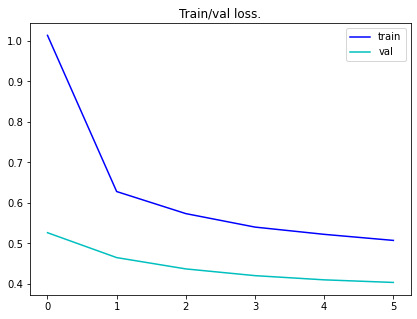

epoch   7/  7 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   7/  7 took 388.89s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.4023 | accuracy: 0.8979 | f1-weighted: 0.8975 | f1-micro: 0.8979


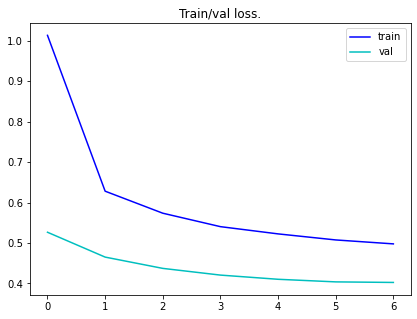

In [12]:
model = model_swin

opt = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.05)

ckpt_name = os.path.join(MODELS_PATH, 'model_1.ckpt')
model = model.to(device)

runner = Runner(model, opt, device, ckpt_name)
runner.train(train_batch_gen, val_batch_gen, n_epochs=7, visualize=True)

epoch   1/  5 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   1/  5 took 432.90s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.4082 | accuracy: 0.8918 | f1-weighted: 0.8920 | f1-micro: 0.8918


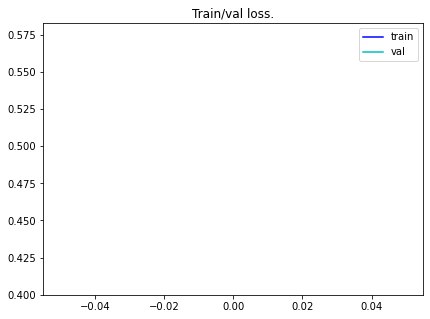

epoch   2/  5 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   2/  5 took 433.74s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.3533 | accuracy: 0.9079 | f1-weighted: 0.9077 | f1-micro: 0.9079


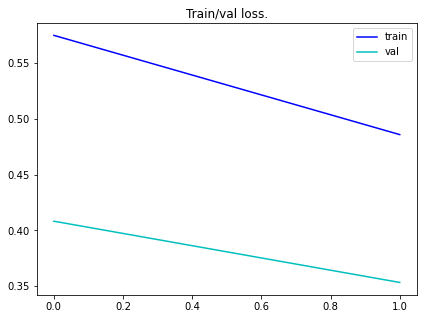

epoch   3/  5 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   3/  5 took 432.33s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.3542 | accuracy: 0.9040 | f1-weighted: 0.9038 | f1-micro: 0.9040


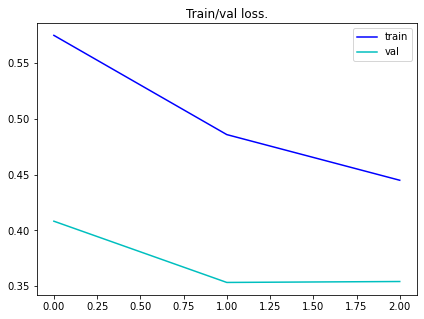

epoch   4/  5 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   4/  5 took 433.12s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.3477 | accuracy: 0.9072 | f1-weighted: 0.9075 | f1-micro: 0.9072


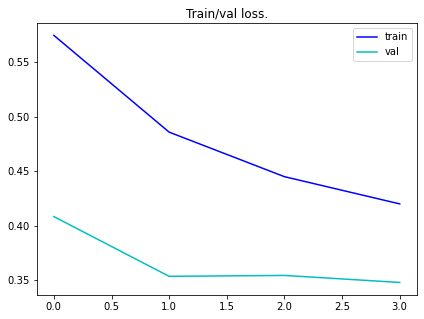

epoch   5/  5 started


Training:   0%|          | 0/284 [00:00<?, ?it/s]

epoch   5/  5 took 431.51s


Evaluation:   0%|          | 0/71 [00:00<?, ?it/s]

val: loss: 0.3192 | accuracy: 0.9179 | f1-weighted: 0.9179 | f1-micro: 0.9179


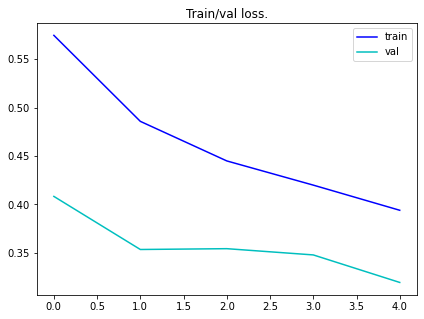

In [13]:
ckpt_name = os.path.join(MODELS_PATH, 'model_2.ckpt')

opt = torch.optim.AdamW(runner.model.parameters(), lr=0.001, weight_decay=0.05)
runner = Runner(model, opt, device, ckpt_name)
for name, p in runner.model.named_parameters():
    p.requires_grad_(False)
    
    if [x for x in 
        ['features.7.1', 'features.7.0', 'features.6']
        if x in name]:
        p.requires_grad_(True)

runner.model.norm.requires_grad_(True)
runner.model.head.requires_grad_(True)


runner.train(train_batch_gen, val_batch_gen, n_epochs=5, visualize=True, opt=opt)

epoch   1/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   1/ 10 took 638.46s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.3597 | accuracy: 0.9045 | f1-weighted: 0.9049 | f1-micro: 0.9045


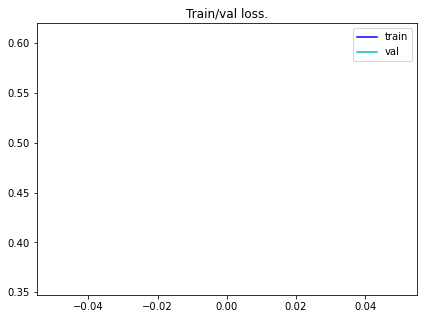

epoch   2/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   2/ 10 took 638.55s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.3237 | accuracy: 0.9121 | f1-weighted: 0.9123 | f1-micro: 0.9121


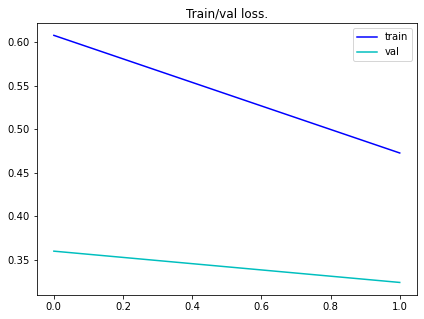

epoch   3/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   3/ 10 took 638.22s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.3282 | accuracy: 0.9168 | f1-weighted: 0.9176 | f1-micro: 0.9168


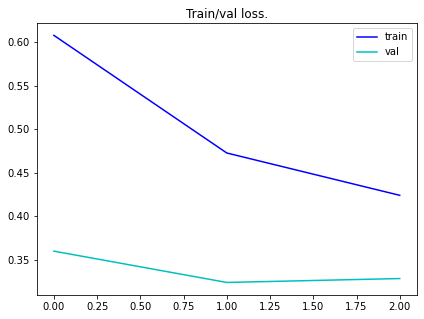

epoch   4/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   4/ 10 took 636.31s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.3149 | accuracy: 0.9217 | f1-weighted: 0.9216 | f1-micro: 0.9217


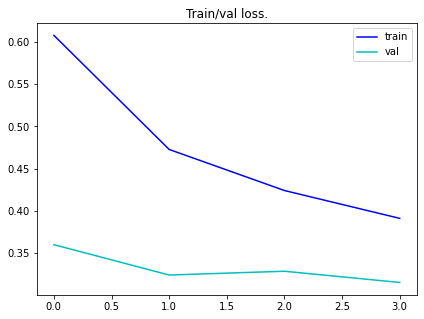

epoch   5/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   5/ 10 took 638.54s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.3000 | accuracy: 0.9256 | f1-weighted: 0.9254 | f1-micro: 0.9256


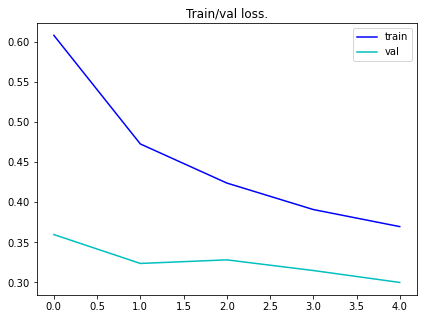

epoch   6/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   6/ 10 took 636.49s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2953 | accuracy: 0.9242 | f1-weighted: 0.9243 | f1-micro: 0.9242


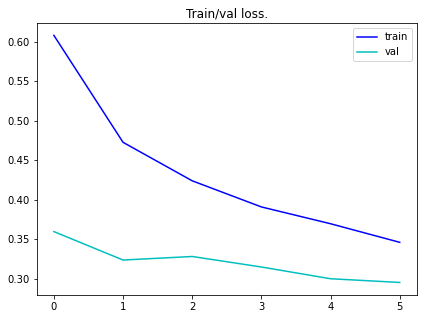

epoch   7/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   7/ 10 took 635.25s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.3057 | accuracy: 0.9208 | f1-weighted: 0.9209 | f1-micro: 0.9208


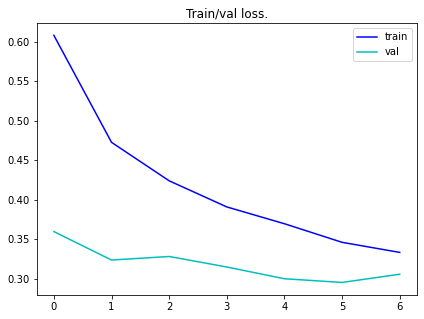

epoch   8/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   8/ 10 took 631.44s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2887 | accuracy: 0.9287 | f1-weighted: 0.9288 | f1-micro: 0.9287


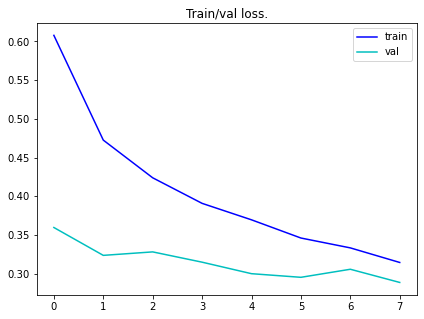

epoch   9/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   9/ 10 took 631.64s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2924 | accuracy: 0.9260 | f1-weighted: 0.9258 | f1-micro: 0.9260


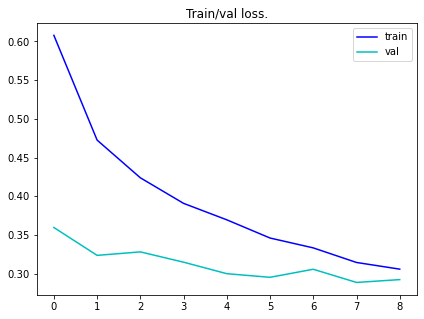

epoch  10/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch  10/ 10 took 631.93s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2816 | accuracy: 0.9306 | f1-weighted: 0.9306 | f1-micro: 0.9306


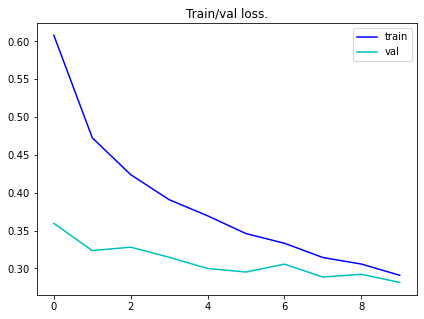

In [7]:
ckpt_name = os.path.join(MODELS_PATH, 'model_3.ckpt')

opt = None
runner = Runner(model, opt, device, ckpt_name)
for name, p in runner.model.named_parameters():
    p.requires_grad_(False)
    
    if [x for x in 
        ['features.7.1', 'features.7.0', 'features.6', 'features.5.17', 'features.5.16',
        'features.5.15', 'features.5.14', 'features.5.13', 'features.5.12', 'features.5.11'
        ]
        if x in name]:
        p.requires_grad_(True)

runner.model.norm.requires_grad_(True)
runner.model.head.requires_grad_(True)

opt = torch.optim.AdamW(runner.model.parameters(), lr=0.001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, factor=0.5, patience=2, verbose=True)

runner.train(train_batch_gen, val_batch_gen, n_epochs=10, visualize=True,
            opt=opt, scheduler=scheduler)

epoch   1/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   1/ 10 took 640.67s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2516 | accuracy: 0.9423 | f1-weighted: 0.9422 | f1-micro: 0.9423


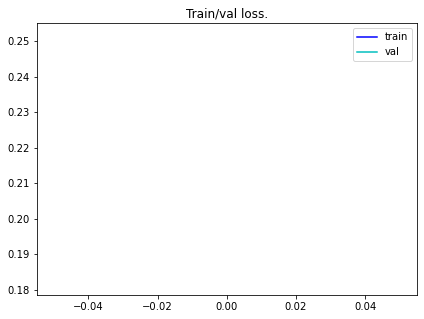

epoch   2/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   2/ 10 took 639.88s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2511 | accuracy: 0.9435 | f1-weighted: 0.9435 | f1-micro: 0.9435


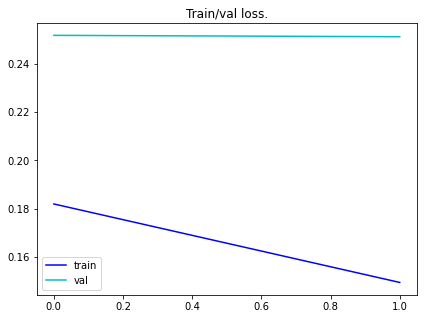

epoch   3/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   3/ 10 took 639.20s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2490 | accuracy: 0.9445 | f1-weighted: 0.9444 | f1-micro: 0.9445


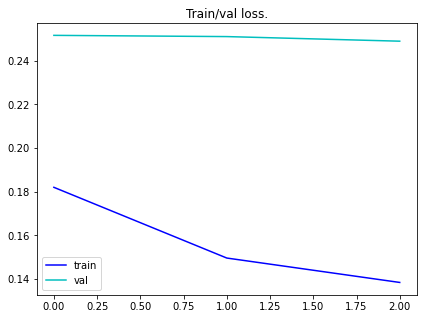

epoch   4/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   4/ 10 took 638.94s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2494 | accuracy: 0.9442 | f1-weighted: 0.9443 | f1-micro: 0.9442


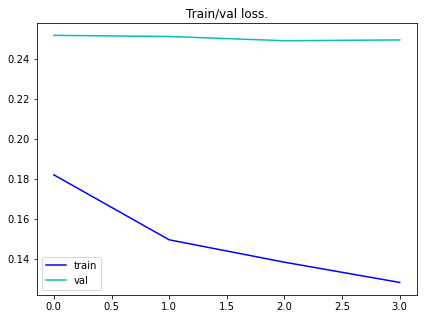

epoch   5/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   5/ 10 took 660.27s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2514 | accuracy: 0.9442 | f1-weighted: 0.9442 | f1-micro: 0.9442


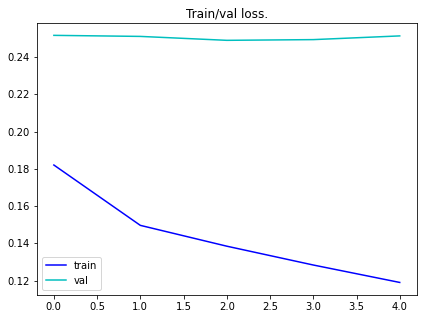

epoch   6/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   6/ 10 took 642.66s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2588 | accuracy: 0.9442 | f1-weighted: 0.9442 | f1-micro: 0.9442


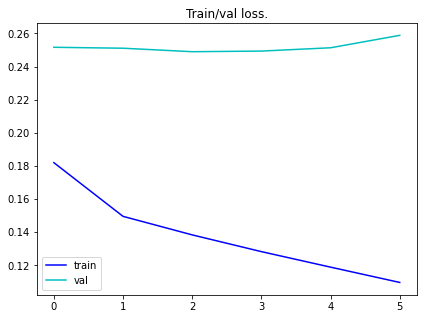

Epoch 00006: reducing learning rate of group 0 to 5.0000e-05.
epoch   7/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   7/ 10 took 644.68s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2560 | accuracy: 0.9458 | f1-weighted: 0.9458 | f1-micro: 0.9458


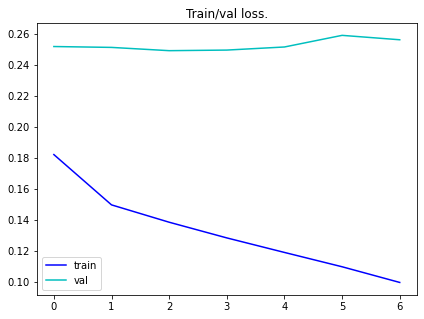

epoch   8/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   8/ 10 took 651.31s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2615 | accuracy: 0.9458 | f1-weighted: 0.9457 | f1-micro: 0.9458


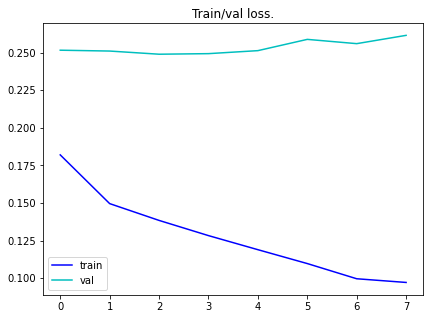

epoch   9/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

epoch   9/ 10 took 645.88s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2637 | accuracy: 0.9452 | f1-weighted: 0.9452 | f1-micro: 0.9452


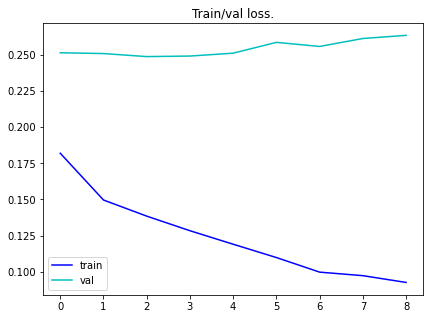

Epoch 00009: reducing learning rate of group 0 to 2.5000e-05.
epoch  10/ 10 started


Training:   0%|          | 0/568 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [6]:
ckpt_name = os.path.join(MODELS_PATH, 'model_4.ckpt')

opt = None
model = None
runner = Runner(model, opt, device, ckpt_name)
for name, p in runner.model.named_parameters():
    p.requires_grad_(False)
    
    if [x for x in 
        ['features.7.1', 'features.7.0', 'features.6', 'features.5.17', 'features.5.16',
        'features.5.15', 'features.5.14', 'features.5.13', 'features.5.12', 'features.5.11'
        ]
        if x in name]:
        p.requires_grad_(True)

runner.model.norm.requires_grad_(True)
runner.model.head.requires_grad_(True)

opt = torch.optim.AdamW(runner.model.parameters(), lr=0.0001, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, factor=0.5, patience=2, verbose=True)

runner.train(train_batch_gen, val_batch_gen, n_epochs=10, visualize=True,
            opt=opt, scheduler=scheduler)

## prediction без дообучения

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import gc
import torch
import torchvision
import pandas as pd

from runner import Runner
from utils import train_val_dataset, plot_from_batch_generator, ImageTransformer, ImageFolder2

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
DATA_PATH = '../data/'
RESULTS_PATH = 'results/'
MODELS_PATH = 'models/'
NUM_CLASSES = 30
BATCH_SIZE = 128
NUM_WORKERS = 4

In [4]:
classes = ImageFolder2(
    os.path.join(DATA_PATH, 'train'),
    os.path.join(DATA_PATH, 'train.csv'),
).class_i_to_label

test_dataset = ImageFolder2(
    os.path.join(DATA_PATH, 'test'),
    os.path.join(DATA_PATH, 'test.csv'),
    is_test=True
)

transformer = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_dataset = ImageTransformer(test_dataset, transformer)

test_batch_gen = torch.utils.data.DataLoader(test_dataset,
                                            batch_size=BATCH_SIZE * 2,
                                            num_workers=NUM_WORKERS)

In [5]:
opt = None
model = None
runner = Runner(model, opt, device, None,
                saved_checkpoint=os.path.join(MODELS_PATH, 'model_4.ckpt'))
for name, p in runner.model.named_parameters():
    p.requires_grad_(False)

predictions = runner.get_predictions(test_batch_gen, device, classes)

prediction: 0it [00:00, ?it/s]

In [7]:
t = predictions.groupby(['image_id',])['label'].agg(lambda x: x.value_counts().index[0]).to_frame().reset_index()

test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
test = test.merge(t, on=['image_id'])
test.to_csv(os.path.join(RESULTS_PATH, 'res_2.csv'), index=False)
test

,image_id,label
0,00fd3c23-193c-480a-aef9-bb438d50d79e.jpeg,ski_race
1,ef5473b9-a558-4f38-acd0-be4ecfde5a23.jpeg,basketball
2,ba00f9b4-7cbf-4110-91ea-ed41f5cb4ee4.jpeg,alpinism
3,f1bdf877-4379-4e00-b5b8-1e90bdcbda76.jpeg,tennis
4,4c96ff83-07e3-45a4-934f-a92ebf49b299.jpeg,fencing
...,...,...
19441,01ec2a50-db12-4b98-94da-1dd9372650cf.jpeg,skating
19442,1596a0c0-5772-4309-8781-47e15dcdd5d5.jpeg,boxing
19443,65610b2c-c137-468a-85a6-a3ec2ed9e87f.jpeg,basketball
19444,5630e635-fce1-4a33-8748-b7416d16fffc.jpeg,water_polo


## дообучим вместе с данными которые были на валидации

In [6]:
full_train_dataset = ImageTransformer(train_dataset, train_transform)
full_train_dataset.classes = train_dataset.classes

full_train_batch_gen = torch.utils.data.DataLoader(full_train_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   shuffle=True,
                                                   num_workers=NUM_WORKERS)

epoch   1/  5 started


Training:   0%|          | 0/709 [00:00<?, ?it/s]

epoch   1/  5 took 837.21s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.2108 | accuracy: 0.9510 | f1-weighted: 0.9509 | f1-micro: 0.9510


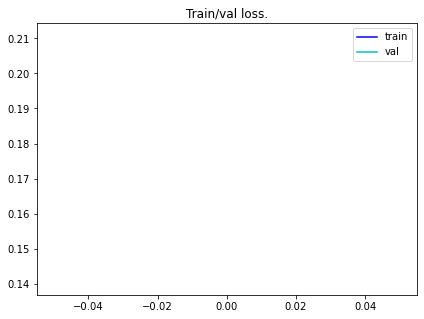

epoch   2/  5 started


Training:   0%|          | 0/709 [00:00<?, ?it/s]

epoch   2/  5 took 801.50s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.1893 | accuracy: 0.9547 | f1-weighted: 0.9547 | f1-micro: 0.9547


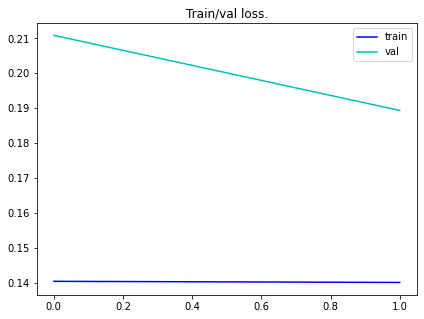

epoch   3/  5 started


Training:   0%|          | 0/709 [00:00<?, ?it/s]

epoch   3/  5 took 803.85s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.1705 | accuracy: 0.9578 | f1-weighted: 0.9578 | f1-micro: 0.9578


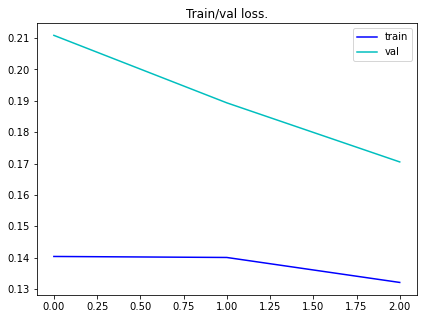

epoch   4/  5 started


Training:   0%|          | 0/709 [00:00<?, ?it/s]

epoch   4/  5 took 810.33s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.1555 | accuracy: 0.9610 | f1-weighted: 0.9609 | f1-micro: 0.9610


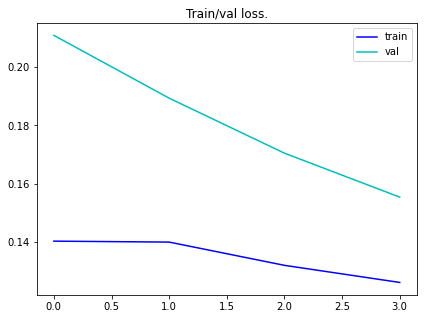

epoch   5/  5 started


Training:   0%|          | 0/709 [00:00<?, ?it/s]

epoch   5/  5 took 812.45s


Evaluation:   0%|          | 0/142 [00:00<?, ?it/s]

val: loss: 0.1408 | accuracy: 0.9633 | f1-weighted: 0.9633 | f1-micro: 0.9633


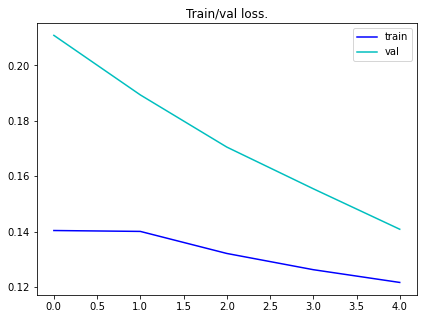

In [7]:
ckpt_name = os.path.join(MODELS_PATH, 'model_swin_simple_t_(0_9458)_valfill.ckpt')

opt = None
model = None
runner = Runner(model, opt, device, ckpt_name,
                saved_checkpoint=os.path.join(MODELS_PATH, 'model_4.ckpt'))
for name, p in runner.model.named_parameters():
    p.requires_grad_(False)
    
    if [x for x in 
        ['features.7.1', 'features.7.0', 'features.6', 'features.5.17', 'features.5.16',
        'features.5.15', 'features.5.14', 'features.5.13', 'features.5.12', 'features.5.11'
        ]
        if x in name]:
        p.requires_grad_(True)

runner.model.norm.requires_grad_(True)
runner.model.head.requires_grad_(True)

opt = torch.optim.AdamW(runner.model.parameters(), lr=5.0e-05, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, factor=0.5, patience=2, verbose=True)

runner.train(full_train_batch_gen, val_batch_gen, n_epochs=5, visualize=True,
            opt=opt, scheduler=scheduler)

## prediction после дообучения с использованием данных валидации

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import gc
import torch
import torchvision
import pandas as pd

from runner import Runner
from utils import train_val_dataset, plot_from_batch_generator, ImageTransformer, ImageFolder2

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
DATA_PATH = '../data/'
RESULTS_PATH = 'results/'
MODELS_PATH = 'models/'
NUM_CLASSES = 30
BATCH_SIZE = 128
NUM_WORKERS = 4

In [4]:
classes = ImageFolder2(
    os.path.join(DATA_PATH, 'train'),
    os.path.join(DATA_PATH, 'train.csv'),
).class_i_to_label

test_dataset = ImageFolder2(
    os.path.join(DATA_PATH, 'test'),
    os.path.join(DATA_PATH, 'test.csv'),
    is_test=True
)

transformer = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_dataset = ImageTransformer(test_dataset, transformer)

test_batch_gen = torch.utils.data.DataLoader(test_dataset,
                                            batch_size=BATCH_SIZE * 2,
                                            num_workers=NUM_WORKERS)

In [5]:
opt = None
model = None
runner = Runner(model, opt, device, None,
                saved_checkpoint=os.path.join(MODELS_PATH, 'model_swin_simple_t_(0_9458)_valfill.ckpt'))
for name, p in runner.model.named_parameters():
    p.requires_grad_(False)

predictions = runner.get_predictions(test_batch_gen, device, classes)

prediction: 0it [00:00, ?it/s]

In [6]:
t = predictions.groupby(['image_id',])['label'].agg(lambda x: x.value_counts().index[0]).to_frame().reset_index()

test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
test = test.merge(t, on=['image_id'])
test.to_csv(os.path.join(RESULTS_PATH, 'res_3.csv'), index=False)
test

,image_id,label
0,00fd3c23-193c-480a-aef9-bb438d50d79e.jpeg,ski_race
1,ef5473b9-a558-4f38-acd0-be4ecfde5a23.jpeg,basketball
2,ba00f9b4-7cbf-4110-91ea-ed41f5cb4ee4.jpeg,alpinism
3,f1bdf877-4379-4e00-b5b8-1e90bdcbda76.jpeg,tennis
4,4c96ff83-07e3-45a4-934f-a92ebf49b299.jpeg,fencing
...,...,...
19441,01ec2a50-db12-4b98-94da-1dd9372650cf.jpeg,skating
19442,1596a0c0-5772-4309-8781-47e15dcdd5d5.jpeg,boxing
19443,65610b2c-c137-468a-85a6-a3ec2ed9e87f.jpeg,basketball
19444,5630e635-fce1-4a33-8748-b7416d16fffc.jpeg,water_polo
